In [120]:
import pandas as pd
import numpy as np
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv("./training.csv")

In [122]:
#Add weeks
df["dayOfWeek"] = df["dayOfTheYear"]%7 + 1

In [123]:
def determine_season(x):
    if(79<= x and x <= 171):
        #spring
        return 1;
    elif(172 <= x and x <= 265):
        return 2;
    elif(265 <= x and x <= 358):
        return 3;
    else:
        return 4;

#Add Astronomical Seasons
df["season"] = df["dayOfTheYear"].apply(lambda x: determine_season(x))

In [124]:
#Remove outlier days: 184, 185
df = df[df["dayOfTheYear"] != 184]
df = df[df["dayOfTheYear"] != 185]

In [125]:
df.head()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,Cash/Credit Site,EBT Site,Loyalty Site,ExtraMile Site,CoBrand,Alcohol,Carwash,Food Service,City,State,dayOfWeek,season
0,1000,1,1,3,False,True,True,True,No,True,False,True,HOUSTON,TX,2,4
1,1000,1,2,5,False,True,True,True,No,True,False,True,HOUSTON,TX,2,4
2,1000,1,3,6,False,True,True,True,No,True,False,True,HOUSTON,TX,2,4
3,1000,1,4,3,False,True,True,True,No,True,False,True,HOUSTON,TX,2,4
4,1000,2,1,13,False,True,True,True,No,True,False,True,HOUSTON,TX,3,4


In [126]:
#remove unhelpful data - all data has same value
df = df.drop(columns=['Food Service', 'State', 'Loyalty Site', 'ExtraMile Site', 'Cash/Credit Site', 'CoBrand'])

#remove data - map exactly to store number
df = df.drop(columns=['EBT Site', 'Alcohol', 'Carwash', 'City'])

In [127]:
df["GrossSoldQuantity"].describe()

count    5628.000000
mean       22.474769
std        21.865225
min         0.000000
25%         5.000000
50%        13.000000
75%        36.000000
max       133.000000
Name: GrossSoldQuantity, dtype: float64

In [128]:
store1 = df[df["StoreNumber"] == 1000]
store2 = df[df["StoreNumber"] == 2000]
store3 = df[df["StoreNumber"] == 3000]
store4 = df[df["StoreNumber"] == 4000]

bucket1 = df[df["3HourBucket"] == 1]
bucket2 = df[df["3HourBucket"] == 2]
bucket3 = df[df["3HourBucket"] == 3]
bucket4 = df[df["3HourBucket"] == 4]

day1 = df[df["dayOfWeek"] == 1]
day2 = df[df["dayOfWeek"] == 2]
day3 = df[df["dayOfWeek"] == 3]
day4 = df[df["dayOfWeek"] == 4]
day5 = df[df["dayOfWeek"] == 5]
day6 = df[df["dayOfWeek"] == 6]
day7 = df[df["dayOfWeek"] == 7]

In [113]:
def plot(df, indep_var, dep_var, title="Title"):
    plt.scatter(df[indep_var], df[dep_var])
    plt.xlabel(indep_var)
    plt.ylabel(dep_var)
    plt.title(title)
    plt.grid(True)
    plt.show()

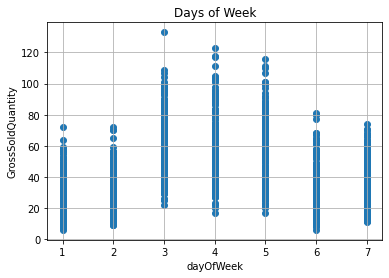

Store 1: count    1405.000000
mean       15.837722
std        16.959290
min         0.000000
25%         5.000000
50%         8.000000
75%        24.000000
max        76.000000
Name: GrossSoldQuantity, dtype: float64
Store 2: count    1409.000000
mean       14.794890
std        16.658794
min         0.000000
25%         4.000000
50%         7.000000
75%        25.000000
max        77.000000
Name: GrossSoldQuantity, dtype: float64
Store 3: count    1405.000000
mean       15.955872
std        16.739398
min         0.000000
25%         4.000000
50%         8.000000
75%        27.000000
max        79.000000
Name: GrossSoldQuantity, dtype: float64
Store 4: count    1409.000000
mean       43.273243
std        22.105632
min         6.000000
25%        27.000000
50%        40.000000
75%        57.000000
max       133.000000
Name: GrossSoldQuantity, dtype: float64


In [142]:
# plot(store4, "dayOfWeek", "GrossSoldQuantity", "Days of Week")
print("Store 1:", store1["GrossSoldQuantity"].describe())
print("Store 2:", store2["GrossSoldQuantity"].describe())
print("Store 3:", store3["GrossSoldQuantity"].describe())
print("Store 4:", store4["GrossSoldQuantity"].describe())

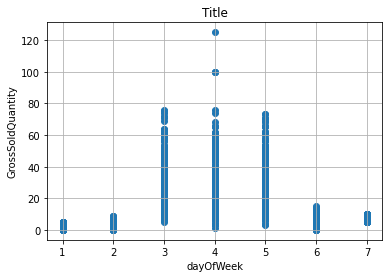

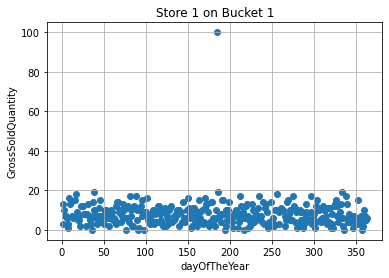

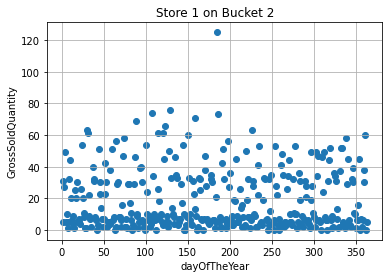

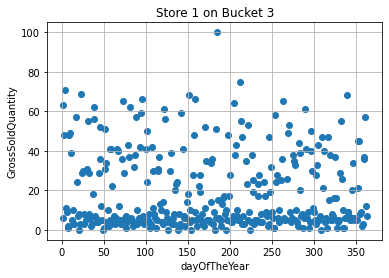

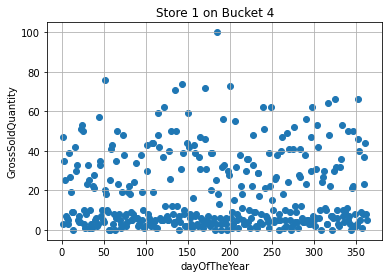

In [116]:
#store 1

store_11 = pd.merge(store1, bucket1)
store_12 = pd.merge(store1, bucket2)
store_13 = pd.merge(store1, bucket3)
store_14 = pd.merge(store1, bucket4)

plot(store1, "dayOfWeek", "GrossSoldQuantity")

plot(store_11, "dayOfTheYear", "GrossSoldQuantity", "Store 1 on Bucket 1")
plot(store_12, "dayOfTheYear", "GrossSoldQuantity", "Store 1 on Bucket 2")
plot(store_13, "dayOfTheYear", "GrossSoldQuantity", "Store 1 on Bucket 3")
plot(store_14, "dayOfTheYear", "GrossSoldQuantity", "Store 1 on Bucket 4")

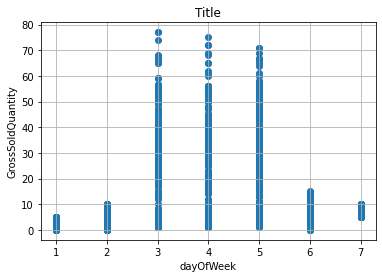

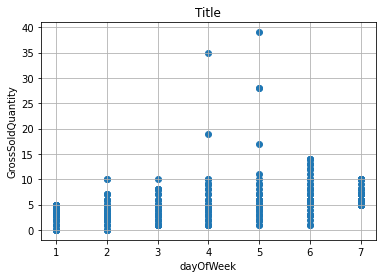

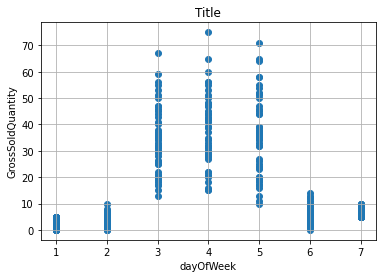

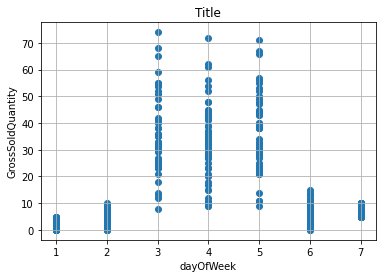

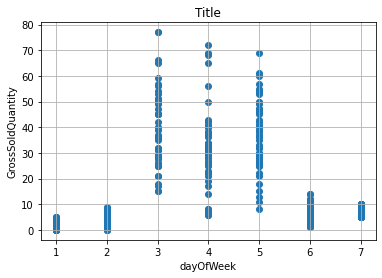

In [53]:
#store 1

store_21 = pd.merge(store2, bucket1)
store_22 = pd.merge(store2, bucket2)
store_23 = pd.merge(store2, bucket3)
store_24 = pd.merge(store2, bucket4)

plot(store2, "dayOfWeek", "GrossSoldQuantity")

plot(store_21, "dayOfWeek", "GrossSoldQuantity")
plot(store_22, "dayOfWeek", "GrossSoldQuantity")
plot(store_23, "dayOfWeek", "GrossSoldQuantity")
plot(store_24, "dayOfWeek", "GrossSoldQuantity")

In [54]:
df.head()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,dayOfWeek,season
0,1000,1,1,3,2,4
1,1000,1,2,5,2,4
2,1000,1,3,6,2,4
3,1000,1,4,3,2,4
4,1000,2,1,13,3,4


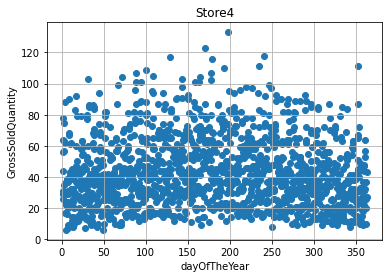

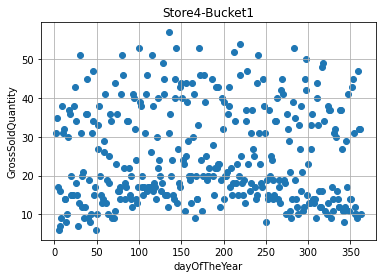

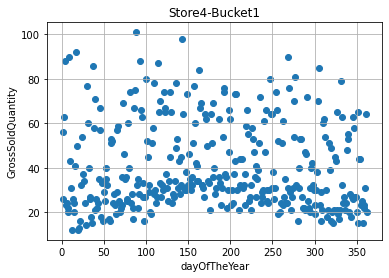

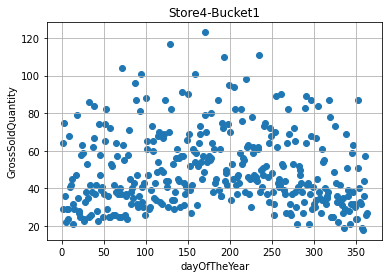

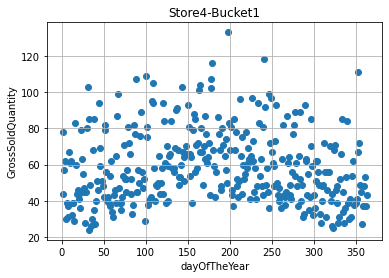

In [55]:
plot(store4, "dayOfTheYear", "GrossSoldQuantity", "Store4")

store_41 = pd.merge(store4, bucket1)
store_42 = pd.merge(store4, bucket2)
store_43 = pd.merge(store4, bucket3)
store_44 = pd.merge(store4, bucket4)

plot(store_41, "dayOfTheYear", "GrossSoldQuantity", "Store4-Bucket1")
plot(store_42, "dayOfTheYear", "GrossSoldQuantity", "Store4-Bucket1")
plot(store_43, "dayOfTheYear", "GrossSoldQuantity", "Store4-Bucket1")
plot(store_44, "dayOfTheYear", "GrossSoldQuantity", "Store4-Bucket1")

In [56]:
def rootMSE(actual, pred):
    return np.sqrt(((pred - actual) ** 2).mean())

In [57]:
x = df.drop(columns=['GrossSoldQuantity'])
y = df["GrossSoldQuantity"]

train_x, test_x, train_y, test_y = train_test_split(x, y, 
                                                    test_size=0.2, random_state=101)

In [58]:
reg = LinearRegression().fit(train_x, train_y)
prediction = reg.predict(test_x)
rootMSE(test_y, prediction)

18.88551915712456

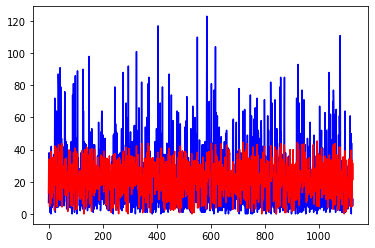

In [59]:
x = np.arange(len(test_y))
plt.plot(x, test_y, label = "line 1", color="blue")
plt.plot(x, prediction, label = "line 2", color="red")

In [87]:
from sklearn.ensemble import RandomForestRegressor

x = df.drop(columns=['GrossSoldQuantity'])
y = df["GrossSoldQuantity"]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.25, random_state=101)
x_train.dtypes
rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=10, n_jobs=None,
                           bootstrap=True, oob_score=True, random_state=101)
model = rf.fit(x_train, y_train) 
print('R^2 Training Score: {:.2f}'.format(rf.score(x_train, y_train)))
print('OOB Score: {:.2f}'.format(rf.oob_score_))
print('Validation Score: {:.2f}'.format(rf.score(x_validation, y_validation)))

y_pred = model.predict(x_validation)
rounded_pred = np.rint(y_pred)

print(rootMSE(y_validation, rounded_pred))

R^2 Training Score: 0.86
OOB Score: 0.81
Validation Score: 0.81
9.517611700445384


In [88]:
#test results
test = pd.read_csv("/Users/rhuck/Documents/Datathon2021/Chevron_2021_Datathon_Challenge/filesFor30MinBeforeJudging/scoring.csv")

#remove unhelpful data - all data has same value
test = test.drop(columns=['Food Service', 'State', 'Loyalty Site', 'ExtraMile Site', 'Cash/Credit Site', 'CoBrand'])

#remove data - map exactly to store number
test = test.drop(columns=['EBT Site', 'Alcohol', 'Carwash', 'City'])

#Add weeks
test["dayOfWeek"] = test["dayOfTheYear"]%7 + 1

#Add Astronomical Seasons
test["season"] = test["dayOfTheYear"].apply(lambda x: determine_season(x))

x_test = test.drop(columns=["GrossSoldQuantity"])
y_test = test["GrossSoldQuantity"]

y_test_pred = model.predict(x_test)
rounded_test_pred = np.rint(y_test_pred)

print(y_test)
print(rounded_test_pred)

print(rootMSE(y_test, rounded_test_pred))

0      0
1      3
2      4
3      1
4      9
5      9
6      3
7      6
8      1
9      2
10     1
11     2
12     1
13     1
14     7
15     3
16     0
17     1
18     1
19     2
20     1
21     2
22     4
23     7
24     6
25    11
26    30
27    24
28    12
29    16
30    18
31    37
Name: GrossSoldQuantity, dtype: int64
[ 2.  3.  4.  4.  5.  6.  5.  6.  3.  3.  3.  4.  6.  5.  5.  5.  2.  4.
  3.  3.  5.  5.  4.  3. 12. 20. 24. 32. 12. 21. 24. 38.]
3.7165171868296265


In [77]:
#Linear Regression
prediction = reg.predict(x_test)
rootMSE(y_test, prediction)

14.990917436473133